# Import Relevant Data and Libraries

In [883]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [884]:
weather_data = pd.read_csv('nyc_weather_data.csv')
mta_data = pd.read_csv('mta_data.csv')

# Clean and Organize Data

In [885]:
#Getting rid of columns that only had NULL values
weather_data.drop('precipprob', axis=1, inplace = True)
weather_data.drop('preciptype', axis=1, inplace = True)
weather_data.drop('name', axis=1, inplace=True)
weather_data.drop('cloudcover', axis=1, inplace=True)
weather_data.drop('windspeed', axis=1, inplace=True)
weather_data['weather_type'] = ''

In [886]:
#Combining 'DATE' and 'TIME' columns into 'DATE_TIME' column that is of type datetime
mta_data["DATE_TIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

#Making sure there is only data from the year 2021
yearMask = mta_data.DATE_TIME.dt.year == 2021
yearfixed_mta_data = mta_data[yearMask]

In [887]:
mta_entries = yearfixed_mta_data.groupby(['STATION', 'DATE', 'TIME', 'DATE_TIME']).ENTRIES.sum().reset_index()
mta_exits = yearfixed_mta_data.groupby(['STATION', 'DATE', 'TIME', 'DATE_TIME']).EXITS.sum().reset_index()

bystation_mta_data = pd.merge(mta_entries, mta_exits, on=['STATION', 'DATE', 'TIME', 'DATE_TIME'])

In [888]:
#Getting rid of the indicatior for time in the datetime column of the Weather dataframe
weather_data.datetime = weather_data.datetime.str.replace('T', ' ')

In [889]:
#Changing the order of the dates in the datetime column of the Weather dataframe to match the MTA dataframe
weather_data['datetime'] = pd.to_datetime(weather_data.datetime, yearfirst = True)

#Change the datetime column to match the MTA dataframe
weather_data.rename(columns={"datetime": "DATE_TIME"}, inplace=True)

#Adding a column that shows the day of the week
weather_data['day_of_week'] = weather_data.DATE_TIME.dt.dayofweek

In [890]:
#Combined to the Weather and MTA data to show what the weather was at every logged MTA entry
MTAweather_data = weatherMTA_data = pd.merge(bystation_mta_data, weather_data, on='DATE_TIME')

meantemp = MTAweather_data.groupby('DATE').temp.mean().reset_index()
weatherMTA_data.drop('temp', axis=1, inplace=True)
weatherMTA_data = pd.merge(weatherMTA_data, meantemp, on=['DATE'])
weatherMTA_data

,STATION,DATE,TIME,DATE_TIME,ENTRIES,EXITS,feelslike,precip,snow,snowdepth,icon,weather_type,day_of_week,temp
0,1 AV,01/01/2021,03:00:00,2021-01-01 03:00:00,462918930,466184159,30.7,0.0,0.00,0.00,clear-night,,4,36.492347
1,103 ST-CORONA,01/01/2021,03:00:00,2021-01-01 03:00:00,63836143,65252949,30.7,0.0,0.00,0.00,clear-night,,4,36.492347
2,104 ST,01/01/2021,03:00:00,2021-01-01 03:00:00,1691703995,990026729,30.7,0.0,0.00,0.00,clear-night,,4,36.492347
3,110 ST,01/01/2021,03:00:00,2021-01-01 03:00:00,41289974,39733454,30.7,0.0,0.00,0.00,clear-night,,4,36.492347
4,111 ST,01/01/2021,03:00:00,2021-01-01 03:00:00,75013183,50521003,30.7,0.0,0.00,0.00,clear-night,,4,36.492347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848806,FULTON ST,12/24/2021,06:00:00,2021-12-24 06:00:00,2457397328,2122876213,25.0,0.0,0.05,1.05,snow,,4,35.365175
848807,FULTON ST,12/24/2021,10:00:00,2021-12-24 10:00:00,2457397698,2122877608,31.1,0.0,0.00,0.95,cloudy,,4,35.365175
848808,FULTON ST,12/24/2021,14:00:00,2021-12-24 14:00:00,2457398664,2122879739,34.9,0.0,0.00,0.78,partly-cloudy-day,,4,35.365175
848809,FULTON ST,12/24/2021,18:00:00,2021-12-24 18:00:00,2457400057,2122882059,35.2,0.0,0.00,0.61,partly-cloudy-night,,4,35.365175


# Finding Days with Good or Bad weather

In [891]:
#p = weatherMTA_data.groupby(['STATION', 'LINENAME', 'DIVISION', 'DATE', 'weather_type', 'day_of_week']).precip.sum().reset_index()
#s = weatherMTA_data.groupby(['STATION', 'LINENAME', 'DIVISION', 'DATE', 'weather_type', 'day_of_week']).snow.sum().reset_index()
entry = weatherMTA_data.groupby(['STATION', 'DATE', 'weather_type', 'day_of_week', 'temp']).ENTRIES.sum().reset_index()
exit = weatherMTA_data.groupby(['STATION', 'DATE', 'weather_type', 'day_of_week', 'temp']).EXITS.sum().reset_index()
ee = pd.merge(entry, exit, on=['STATION', 'DATE', 'weather_type', 'day_of_week', 'temp'])
#eep = pd.merge(ee, p, on=['STATION', 'LINENAME', 'DIVISION', 'DATE', 'weather_type', 'day_of_week'])
#eeps = pd.merge(eep, s, on=['STATION', 'LINENAME', 'DIVISION', 'DATE', 'weather_type', 'day_of_week'])
ee['DATE'] = pd.to_datetime(ee.DATE)

In [892]:
#Using my original Weather dataframe, I calculated how much rain, snow, and, at most, how much snow was on the 
#ground each day of the year
days_of_year = weather_data.DATE_TIME.dt.date

days_of_rain = weather_data.groupby([days_of_year, 'day_of_week']).precip.sum().reset_index()
days_of_rain.rename(columns={'DATE_TIME': 'DATE'}, inplace=True)
days_of_rain.DATE = pd.to_datetime(days_of_rain.DATE)

days_of_snow = weather_data.groupby([days_of_year, 'day_of_week']).snow.sum().reset_index()
days_of_snow.rename(columns={'DATE_TIME': 'DATE'}, inplace=True)
days_of_snow.DATE = pd.to_datetime(days_of_snow.DATE)

snow_on_ground_days = weather_data.groupby([days_of_year, 'day_of_week']).snowdepth.max().reset_index()
snow_on_ground_days.rename(columns={'DATE_TIME': 'DATE'}, inplace=True)
snow_on_ground_days.DATE = pd.to_datetime(snow_on_ground_days.DATE)


eep = pd.merge(ee, days_of_rain, on=['DATE', 'day_of_week'])
eeps = pd.merge(eep, days_of_snow, on=['DATE', 'day_of_week'])
weatherMTA_data = pd.merge(eeps, snow_on_ground_days, on=['DATE', 'day_of_week'])
weatherMTA_data

,STATION,DATE,weather_type,day_of_week,temp,ENTRIES,EXITS,precip,snow,snowdepth
0,1 AV,2021-01-01,,4,36.492347,2777518471,2797113963,0.61,0.00,0.00
1,103 ST,2021-01-01,,4,36.492347,801892215,708920489,0.61,0.00,0.00
2,103 ST-CORONA,2021-01-01,,4,36.492347,383027972,391526405,0.61,0.00,0.00
3,104 ST,2021-01-01,,4,36.492347,10150225813,5940161190,0.61,0.00,0.00
4,110 ST,2021-01-01,,4,36.492347,247743733,238406207,0.61,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
128060,WOODLAWN,2021-12-24,,4,35.365175,202888718,78322785,0.03,0.45,1.15
128061,WORLD TRADE CTR,2021-12-24,,4,35.365175,9615375661,11073740815,0.03,0.45,1.15
128062,WTC-CORTLANDT,2021-12-24,,4,35.365175,4429043636,36009918,0.03,0.45,1.15
128063,YORK ST,2021-12-24,,4,35.365175,184261690,63517485,0.03,0.45,1.15


In [893]:
weatherMTA_data['total_precip'] = weatherMTA_data['precip'] + weatherMTA_data['snow']
weatherMTA_data['weather_type'] = np.where(weatherMTA_data['total_precip']>0., 'bad', 'good')

,STATION,DATE,weather_type,day_of_week,temp,ENTRIES,EXITS,precip,snow,snowdepth,total_precip
0,1 AV,2021-01-01,bad,4,36.492347,2777518471,2797113963,0.61,0.00,0.00,0.61
1,103 ST,2021-01-01,bad,4,36.492347,801892215,708920489,0.61,0.00,0.00,0.61
2,103 ST-CORONA,2021-01-01,bad,4,36.492347,383027972,391526405,0.61,0.00,0.00,0.61
3,104 ST,2021-01-01,bad,4,36.492347,10150225813,5940161190,0.61,0.00,0.00,0.61
4,110 ST,2021-01-01,bad,4,36.492347,247743733,238406207,0.61,0.00,0.00,0.61
...,...,...,...,...,...,...,...,...,...,...,...
128060,WOODLAWN,2021-12-24,bad,4,35.365175,202888718,78322785,0.03,0.45,1.15,0.48
128061,WORLD TRADE CTR,2021-12-24,bad,4,35.365175,9615375661,11073740815,0.03,0.45,1.15,0.48
128062,WTC-CORTLANDT,2021-12-24,bad,4,35.365175,4429043636,36009918,0.03,0.45,1.15,0.48
128063,YORK ST,2021-12-24,bad,4,35.365175,184261690,63517485,0.03,0.45,1.15,0.48


In [933]:
months = weatherMTA_data.DATE.dt.month
#weatherMTA_data.groupby([months, "STATION"]).weather_type.value_counts()
wea_type_count = weatherMTA_data[['DATE', 'weather_type']]
wea_type_count.groupby(months).weather_type.value_counts().rse

DATE  weather_type
1     good            6431
      bad             4651
2     bad             8235
      good            1791
3     good            6447
      bad             4658
4     good            6443
      bad             4293
5     good            6431
      bad             4645
6     good            6443
      bad             4295
7     bad             6790
      good            4290
8     good            6807
      bad             4299
9     good            7174
      bad             3584
10    good            7506
      bad             3577
11    good            7860
      bad             2856
12    good            5352
      bad             3207
Name: weather_type, dtype: int64

In [894]:
good_weather_mask = weatherMTA_data.weather_type == 'good'
g_weather = good_weather = weatherMTA_data[good_weather_mask]
bad_weather_mask = weatherMTA_data.weather_type == 'bad'
b_weather = bad_weather = weatherMTA_data[bad_weather_mask]
g_weather['foot_traffic'] = g_weather['ENTRIES'] + g_weather['EXITS']
b_weather['foot_traffic'] = b_weather['ENTRIES'] + b_weather['EXITS']
good_weather

/var/folders/q8/hmm1qyv96398yg9fsy5lq9n80000gn/T/ipykernel_98252/3235867997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_weather['foot_traffic'] = g_weather['ENTRIES'] + g_weather['EXITS']
/var/folders/q8/hmm1qyv96398yg9fsy5lq9n80000gn/T/ipykernel_98252/3235867997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_weather['foot_traffic'] = b_weather['ENTRIES'] + b_weather['EXITS']


,STATION,DATE,weather_type,day_of_week,temp,ENTRIES,EXITS,precip,snow,snowdepth,total_precip,foot_traffic
1434,1 AV,2021-01-05,good,1,38.762041,2777608478,2797264170,0.0,0.0,0.13,0.0,5574872648
1435,103 ST,2021-01-05,good,1,38.762041,802032438,709077452,0.0,0.0,0.13,0.0,1511109890
1436,103 ST-CORONA,2021-01-05,good,1,38.762041,383195177,391700728,0.0,0.0,0.13,0.0,774895905
1437,104 ST,2021-01-05,good,1,38.762041,10150252954,5940178286,0.0,0.0,0.13,0.0,16090431240
1438,110 ST,2021-01-05,good,1,38.762041,247802445,238492060,0.0,0.0,0.13,0.0,486294505
...,...,...,...,...,...,...,...,...,...,...,...,...
126992,WOODLAWN,2021-12-21,good,1,37.395485,202836293,78302100,0.0,0.0,0.00,0.0,281138393
126993,WORLD TRADE CTR,2021-12-21,good,1,37.395485,9615286590,11073632689,0.0,0.0,0.00,0.0,20688919279
126994,WTC-CORTLANDT,2021-12-21,good,1,37.395485,4428968974,35914328,0.0,0.0,0.00,0.0,4464883302
126995,YORK ST,2021-12-21,good,1,37.395485,184200577,63455598,0.0,0.0,0.00,0.0,247656175


Text(0.5, 1.0, 'Number of Commuters by Month')

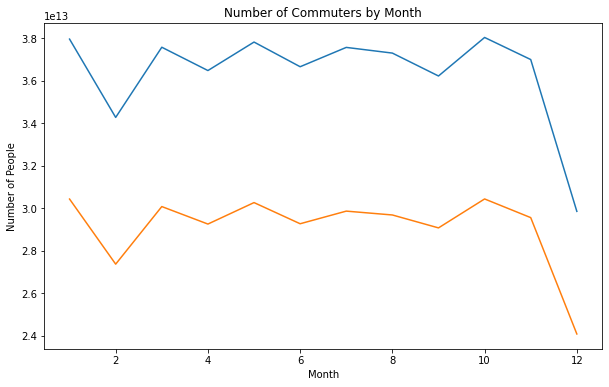

In [848]:
months = weatherMTA_data.DATE.dt.month
en_month_data = weatherMTA_data.groupby(months).ENTRIES.sum().reset_index()
ex_month_data = weatherMTA_data.groupby(months).EXITS.sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(en_month_data.DATE, en_month_data.ENTRIES, label='Entries')
plt.plot(ex_month_data.DATE, ex_month_data.EXITS, label='Exits')
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.title('Number of Commuters by Month')

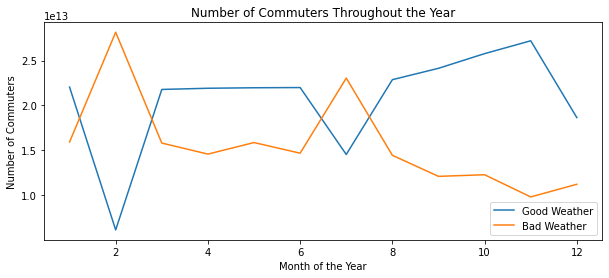

In [762]:
g = good_weather.groupby(months).ENTRIES.sum().reset_index()
g.rename(columns={"ENTRIES": "Good Weather Entries"}, inplace=True)

b = bad_weather.groupby(months).ENTRIES.sum().reset_index()
b.rename(columns={"ENTRIES": "Bad Weather Entries"}, inplace=True)


all_commuters = pd.merge(g, b, on=['DATE'])

plt.figure(figsize=(10, 4))
plt.plot(all_commuters.DATE, all_commuters['Good Weather Entries'], label = 'Good Weather')
plt.plot(all_commuters.DATE, all_commuters['Bad Weather Entries'], label = 'Bad Weather')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Commuters')
plt.title('Number of Commuters Throughout the Year')
plt.legend()
plt.show()

#plt.title('Number of Commuters During Good Weather')
#plt.xlabel('Day of the Week')
#plt.ylabel('Number of Commuters')

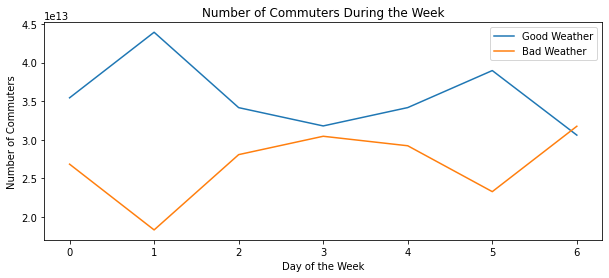

In [763]:
g = good_weather.groupby('day_of_week').ENTRIES.sum().reset_index()
g.rename(columns={"ENTRIES": "Good Weather Entries"}, inplace=True)

b = bad_weather.groupby('day_of_week').ENTRIES.sum().reset_index()
b.rename(columns={"ENTRIES": "Bad Weather Entries"}, inplace=True)

weekly_commuters = pd.merge(g, b, on=['day_of_week'])

plt.figure(figsize=(10, 4))
plt.plot(weekly_commuters.day_of_week, weekly_commuters['Good Weather Entries'], label = 'Good Weather')
plt.plot(weekly_commuters.day_of_week, weekly_commuters['Bad Weather Entries'], label = 'Bad Weather')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Commuters')
plt.title('Number of Commuters During the Week')
plt.legend()
plt.show()

In [764]:
gentry = good_weather.groupby(['STATION']).ENTRIES.sum().reset_index()
gexit = good_weather.groupby('STATION').EXITS.sum().reset_index()
gweather_stations = pd.merge(gentry, gexit, on=['STATION'])
gweather_stations.rename(columns={'ENTRIES': 'Good Weather Entries', 'EXITS': 'Good Weather Exits'}, inplace=True)

bentry = bad_weather.groupby('STATION').ENTRIES.sum().reset_index()
bexit = bad_weather.groupby('STATION').EXITS.sum().reset_index()
bweather_stations = pd.merge(bentry, bexit, on=['STATION'])
bweather_stations.rename(columns={'ENTRIES': 'Bad Weather Entries', 'EXITS': 'Bad Weather Exits'}, inplace=True)

stations = pd.merge(gweather_stations, bweather_stations, on=['STATION'])

stations['Entry Diff'] = ((stations['Bad Weather Entries']/stations['Good Weather Entries'])*100)
stations.sort_values('Entry Diff', ascending=False).head(10)

stations['Exit Diff'] = ((stations['Bad Weather Exits']/stations['Good Weather Exits'])*100)
stations.sort_values('Exit Diff', ascending=False)


,STATION,Good Weather Entries,Good Weather Exits,Bad Weather Entries,Bad Weather Exits,Entry Diff,Exit Diff
251,JOURNAL SQUARE,1905632,581840,3586985,1177717,188.230729,202.412519
260,LACKAWANNA,1088649,1374061,1314987,1462938,120.790723,106.468199
173,CATHEDRAL PKWY,44574886814,54518939576,40935552574,55747297757,91.835461,102.253085
177,CHAUNCEY ST,2677956183,992765588,2565532789,1012128131,95.801896,101.950364
220,FT HAMILTON PKY,159507421866,59320349238,177698060289,59007653849,111.404258,99.472870
...,...,...,...,...,...,...,...
141,BEACH 60 ST,150471890533,8896558892,112968106462,5448102256,75.075887,61.238309
145,BEDFORD AV,195356065315,237069181235,122703702609,139306180804,62.810286,58.761826
46,238 ST,45826014351,11289568871,31186901846,6261944525,68.055017,55.466640
111,90 ST-ELMHURST,539121333473,670926566155,292563078788,348486731244,54.266648,51.941114


In [765]:
gwEntry = (stations['Good Weather Entries'].sum(axis=0))
gwExits = stations['Good Weather Exits'].sum(axis=0)
bwEntry = (stations['Bad Weather Entries'].sum(axis=0))
bwExits = stations['Bad Weather Exits'].sum(axis=0)

In [846]:
stations['Entry Diff'] = ((stations['Good Weather Entries']/(gwEntry+bwEntry)*100)) - ((stations['Bad Weather Entries']/(gwEntry+bwEntry))*100)
entry_stations = stations.sort_values('Entry Diff', ascending=False).head(25)

stations['Exit Diff'] = ((stations['Good Weather Exits']/(gwExits+bwExits)*100)) - ((stations['Bad Weather Exits']/(gwExits+bwExits))*100)
exit_stations = stations.sort_values('Exit Diff', ascending=False).head(25)

,STATION,Good Weather Entries,Good Weather Exits,Bad Weather Entries,Bad Weather Exits,Entry Diff,Exit Diff
65,42 ST-PORT AUTH,9218573031694,7627260265018,6951958521504,5751291554470,0.518836,0.536923
43,23 ST,7023960324159,7078478282248,5304897141020,5344677806223,0.393500,0.496233
9,125 ST,7895652431999,6153981333725,5874948511937,4460045247318,0.462547,0.484823
169,CANAL ST,4944580536323,6647245361775,3735196924714,5026032760558,0.276832,0.464009
58,34 ST-PENN STA,5720715538477,6310564248911,4340010119540,4766393348523,0.316049,0.441959
221,FULTON ST,5080084068857,5369538964849,3529597744076,3919425736360,0.354912,0.415038
195,DEKALB AV,7964348519466,5334801259413,6016268523187,4030017942164,0.445923,0.373443
337,TIMES SQ-42 ST,5339216633845,4302215705414,3756667769768,3038324490158,0.362251,0.361739
56,34 ST-HERALD SQ,3642755882358,4515865105656,2809289670206,3464817667641,0.190783,0.300821
262,LEXINGTON AV/53,3266241833400,4143010548306,2464238137167,3125926481824,0.183582,0.291101


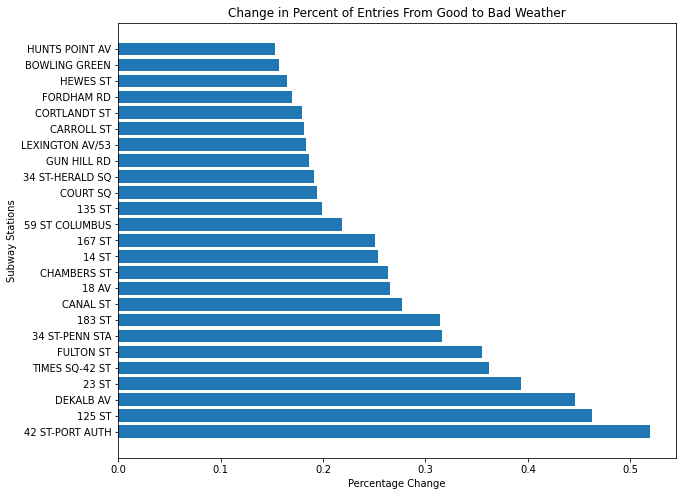

In [900]:
plt.figure(figsize=(10, 8))
plt.barh(entry_stations.STATION, entry_stations['Entry Diff'])
plt.xlabel('Percentage Change')
plt.ylabel('Subway Stations')
plt.title('Change in Percent of Entries From Good to Bad Weather')
plt.savefig('EntryChanges.jpeg')

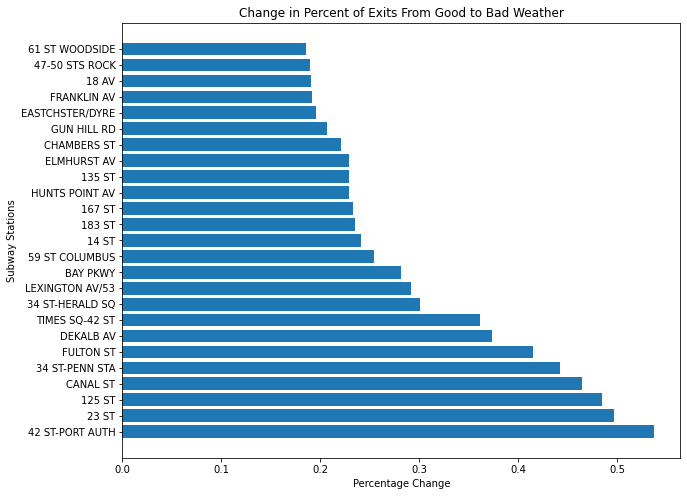

In [901]:
plt.figure(figsize=(10, 8))
plt.barh(exit_stations.STATION, exit_stations['Exit Diff'])
plt.xlabel('Percentage Change')
plt.ylabel('Subway Stations')
plt.title('Change in Percent of Exits From Good to Bad Weather')
plt.savefig('ExitChanges.jpeg')

In [769]:
#JANUARY FOOT TRAFFIC

gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
jan_gentry_mask = gentry.DATE.dt.month == 1
jan_gentry = gentry[jan_gentry_mask]
jang = jan_gentry.groupby('STATION').foot_traffic.mean().reset_index()
jang.rename(columns={'foot_traffic': 'good_foot_trafficJ'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
jan_bentry_mask = bentry.DATE.dt.month == 1
jan_bentry = bentry[jan_bentry_mask]
janb = jan_bentry.groupby('STATION').foot_traffic.mean().reset_index()
janb.rename(columns={'foot_traffic': 'bad_foot_trafficJ'}, inplace=True)

entry_sum = 436865028083319
exit_sum = 349392660960634

jan = pd.merge(jang, janb, on=['STATION'])
#jan['Jan Entry Diff'] = jan['good_foot_trafficJ'] - jan['bad_foot_trafficJ']

jan['Jan Entry Diff'] = ((jan['good_foot_trafficJ']/(entry_sum)*100)) - ((jan['bad_foot_trafficJ']/(entry_sum))*100)
#jan.sort_values('Jan Entry Diff', ascending=False).head(20)

In [770]:
gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
feb_gentry_mask = gentry.DATE.dt.month == 2
feb_gentry = gentry[feb_gentry_mask]
febg = feb_gentry.groupby('STATION').foot_traffic.mean().reset_index()
febg.rename(columns={'foot_traffic': 'good_foot_trafficF'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
feb_bentry_mask = bentry.DATE.dt.month == 2
feb_bentry = bentry[feb_bentry_mask]
febb = feb_bentry.groupby('STATION').foot_traffic.mean().reset_index()
febb.rename(columns={'foot_traffic': 'bad_foot_trafficF'}, inplace=True)

feb = pd.merge(febg, febb, on=['STATION'])
#feb['Feb Entry Diff'] = 100*((feb['good_foot_trafficF'] - feb['bad_foot_trafficF'])/((feb['good_foot_trafficF'] + feb['bad_foot_trafficF'])*2))

feb['Feb Entry Diff'] = ((feb['good_foot_trafficF']/(entry_sum)*100)) - ((feb['bad_foot_trafficF']/(entry_sum))*100)
#feb.sort_values('Feb Entry Diff', ascending=False).head(20)

In [771]:
jf = pd.merge(jan, feb, on=['STATION'])
jf.drop('good_foot_trafficF', axis=1, inplace=True)
jf.drop('bad_foot_trafficF', axis=1, inplace=True)
jf.drop('good_foot_trafficJ', axis=1, inplace=True)
jf.drop('bad_foot_trafficJ', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mar_gentry_mask = gentry.DATE.dt.month == 3
mar_gentry = gentry[mar_gentry_mask]
marg = mar_gentry.groupby('STATION').foot_traffic.mean().reset_index()
marg.rename(columns={'foot_traffic': 'good_foot_trafficM'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mar_bentry_mask = bentry.DATE.dt.month == 3
mar_bentry = bentry[mar_bentry_mask]
marb = mar_bentry.groupby('STATION').foot_traffic.mean().reset_index()
marb.rename(columns={'foot_traffic': 'bad_foot_trafficM'}, inplace=True)

mar = pd.merge(marg, marb, on=['STATION'])
mar['Mar Entry Diff'] = ((mar['good_foot_trafficM']/(entry_sum)*100)) - ((mar['bad_foot_trafficM']/(entry_sum))*100)
#mar.sort_values('Mar Entry Diff', ascending=False).head(20)

In [772]:
jfm = pd.merge(jf, mar, on=['STATION'])
jfm.drop('bad_foot_trafficM', axis=1, inplace=True)
jfm.drop('good_foot_trafficM', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 4
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficA'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 4
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficA'}, inplace=True)

apr = pd.merge(mong, monb, on=['STATION'])
apr['Apr Entry Diff'] = ((apr['good_foot_trafficA']/(entry_sum)*100)) - ((apr['bad_foot_trafficA']/(entry_sum))*100)
#apr.sort_values('Apr Entry Diff', ascending=False).head(20)

In [773]:
jfma = pd.merge(jfm, apr, on=['STATION'])
jfma.drop('bad_foot_trafficA', axis=1, inplace=True)
jfma.drop('good_foot_trafficA', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 5
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficMa'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 5
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficMa'}, inplace=True)

may = pd.merge(mong, monb, on=['STATION'])
may['May Entry Diff'] = ((may['good_foot_trafficMa']/(entry_sum)*100)) - ((may['bad_foot_trafficMa']/(entry_sum))*100)
#may.sort_values('May Entry Diff', ascending=False)

In [774]:
jfmam = pd.merge(jfma, may, on=['STATION'])
jfmam.drop('bad_foot_trafficMa', axis=1, inplace=True)
jfmam.drop('good_foot_trafficMa', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 6
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficJu'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 6
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficJu'}, inplace=True)

jun = pd.merge(mong, monb, on=['STATION'])
jun['Jun Entry Diff'] = ((jun['good_foot_trafficJu']/(entry_sum)*100)) - ((jun['bad_foot_trafficJu']/(entry_sum))*100)
#jun.sort_values('Jun Entry Diff', ascending=False)

In [775]:
jfmamj = pd.merge(jfmam, jun, on=['STATION'])
jfmamj.drop('bad_foot_trafficJu', axis=1, inplace=True)
jfmamj.drop('good_foot_trafficJu', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 7
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficJul'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 7
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficJul'}, inplace=True)

jul = pd.merge(mong, monb, on=['STATION'])
jul['Jul Entry Diff'] = ((jul['good_foot_trafficJul']/(entry_sum)*100)) - ((jul['bad_foot_trafficJul']/(entry_sum))*100)
#jul.sort_values('Jul Entry Diff', ascending=False)

In [776]:
jfmamjj = pd.merge(jfmamj, jul, on=['STATION'])
jfmamjj.drop('bad_foot_trafficJul', axis=1, inplace=True)
jfmamjj.drop('good_foot_trafficJul', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 8
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficAu'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 8
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficAu'}, inplace=True)

aug = pd.merge(mong, monb, on=['STATION'])
aug['Aug Entry Diff'] = ((aug['good_foot_trafficAu']/(entry_sum)*100)) - ((aug['bad_foot_trafficAu']/(entry_sum))*100)
#aug.sort_values('Aug Entry Diff', ascending=False)

In [777]:
jfmamjja = pd.merge(jfmamjj, aug, on=['STATION'])
jfmamjja.drop('bad_foot_trafficAu', axis=1, inplace=True)
jfmamjja.drop('good_foot_trafficAu', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 9
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficS'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 9
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficS'}, inplace=True)

sep = pd.merge(mong, monb, on=['STATION'])
sep['Sep Entry Diff'] = ((sep['good_foot_trafficS']/(entry_sum)*100)) - ((sep['bad_foot_trafficS']/(entry_sum))*100)
#sep.sort_values('Sep Entry Diff', ascending=False)

In [778]:
jfmamjjas = pd.merge(jfmamjja, sep, on=['STATION'])
jfmamjjas.drop('bad_foot_trafficS', axis=1, inplace=True)
jfmamjjas.drop('good_foot_trafficS', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 10
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficO'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 10
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficO'}, inplace=True)

octo = pd.merge(mong, monb, on=['STATION'])
octo['Oct Entry Diff'] = ((octo['good_foot_trafficO']/(entry_sum)*100)) - ((octo['bad_foot_trafficO']/(entry_sum))*100)
#octo.sort_values('Oct Entry Diff', ascending=False)

In [779]:
jfmamjjaso = pd.merge(jfmamjjas, octo, on=['STATION'])
jfmamjjaso.drop('bad_foot_trafficO', axis=1, inplace=True)
jfmamjjaso.drop('good_foot_trafficO', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 11
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficN'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 11
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficN'}, inplace=True)

nov = pd.merge(mong, monb, on=['STATION'])
nov['Nov Entry Diff'] = ((nov['good_foot_trafficN']/(entry_sum)*100)) - ((nov['bad_foot_trafficN']/(entry_sum))*100)
#nov.sort_values('Nov Entry Diff', ascending=False)

In [844]:
jfmamjjason = pd.merge(jfmamjjaso, nov, on=['STATION'])
jfmamjjason.drop('bad_foot_trafficN', axis=1, inplace=True)
jfmamjjason.drop('good_foot_trafficN', axis=1, inplace=True)


gentry = good_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_gentry_mask = gentry.DATE.dt.month == 12
mon_gentry = gentry[mon_gentry_mask]
mong = mon_gentry.groupby('STATION').foot_traffic.mean().reset_index()
mong.rename(columns={'foot_traffic': 'good_foot_trafficD'}, inplace=True)

bentry = bad_weather.groupby(['STATION', 'DATE']).foot_traffic.sum().reset_index()
mon_bentry_mask = bentry.DATE.dt.month == 12
mon_bentry = bentry[mon_bentry_mask]
monb = mon_bentry.groupby('STATION').foot_traffic.mean().reset_index()
monb.rename(columns={'foot_traffic': 'bad_foot_trafficD'}, inplace=True)

dec = pd.merge(mong, monb, on=['STATION'])
dec['Dec Entry Diff'] = ((dec['good_foot_trafficD']/(entry_sum)*100)) - ((dec['bad_foot_trafficD']/(entry_sum))*100)
#dec.sort_values('Dec Entry Diff', ascending=False)

In [895]:
all_year = pd.merge(jfmamjjason, dec, on=['STATION'])
all_year.drop('bad_foot_trafficD', axis=1, inplace=True)
all_year.drop('good_foot_trafficD', axis=1, inplace=True)
all_year

,STATION,Jan Entry Diff,Feb Entry Diff,Mar Entry Diff,Apr Entry Diff,May Entry Diff,Jun Entry Diff,Jul Entry Diff,Aug Entry Diff,Sep Entry Diff,Oct Entry Diff,Nov Entry Diff,Dec Entry Diff
0,1 AV,-5.690432e-07,-2.935554e-07,-1.179316e-05,-1.154793e-07,2.678564e-06,-1.201209e-07,8.518152e-08,-2.084574e-08,3.566811e-08,2.586971e-07,3.670606e-04,-9.062064e-08
1,103 ST,-4.333240e-08,-4.743899e-10,4.874738e-07,4.411214e-07,5.580118e-07,7.203464e-08,8.948231e-08,2.182556e-07,9.010490e-07,-1.227644e-06,2.525176e-06,-1.424723e-06
2,103 ST-CORONA,1.697787e-06,-2.220047e-09,-1.639624e-06,-9.195899e-08,-6.625807e-08,-1.561871e-06,1.503690e-06,-1.404787e-06,2.801000e-08,-2.597145e-07,1.286574e-06,-1.162148e-07
3,104 ST,-3.409909e-05,-1.836066e-10,1.310282e-05,-1.293379e-08,-9.418268e-09,-2.179711e-08,1.148234e-08,-2.288736e-09,3.380514e-08,-2.921742e-05,2.788562e-05,-1.732329e-08
4,110 ST,1.425900e-07,-2.444253e-10,-1.030803e-06,-4.202375e-08,-3.045964e-08,3.063914e-08,6.171096e-07,-9.549951e-09,9.370331e-09,-1.261518e-07,4.443723e-07,8.367099e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,WOODLAWN,7.916598e-07,-5.611444e-10,-5.769256e-07,-2.840440e-07,-1.392714e-08,1.415776e-08,3.577254e-07,-4.823328e-09,5.125073e-09,-5.163312e-08,4.609468e-07,-2.140747e-08
353,WORLD TRADE CTR,-4.362522e-05,3.444786e-05,-4.382262e-05,-2.264819e-08,1.603809e-05,-3.370297e-05,-2.418223e-05,-1.516644e-05,-3.630652e-07,-9.775973e-08,3.581015e-05,-8.350466e-09
354,WTC-CORTLANDT,-8.038462e-09,5.293684e-09,-9.348728e-06,-1.258042e-07,1.885743e-07,3.551664e-08,1.114072e-07,-3.504349e-08,4.928158e-09,-1.303269e-07,7.686562e-06,3.898359e-07
355,YORK ST,-8.969479e-09,5.855117e-10,2.352631e-09,-2.095495e-07,-2.513999e-08,2.717451e-08,3.459593e-08,-4.891839e-07,9.815171e-09,-1.067537e-07,3.776695e-07,-3.892920e-08


In [801]:
enft = weatherMTA_data.groupby('STATION').ENTRIES.sum().reset_index()
exft = weatherMTA_data.groupby('STATION').EXITS.sum().reset_index()
foot_traffic = pd.merge(enft, exft, on=['STATION'])
foot_traffic['foot_traffic'] = foot_traffic['ENTRIES'] + foot_traffic['EXITS']
foot_traffic.sort_values('foot_traffic', ascending=False).head(10)

,STATION,ENTRIES,EXITS,foot_traffic
65,42 ST-PORT AUTH,16170531553198,13378551819488,29549083372686
43,23 ST,12328857465179,12423156088471,24752013553650
9,125 ST,13770600943936,10614026581043,24384627524979
194,DEKALB AV,13980617042653,9364819201577,23345436244230
58,34 ST-PENN STA,10060725658017,11076957597434,21137683255451
169,CANAL ST,8679777461037,11673278122333,20353055583370
220,FULTON ST,8609681812933,9288964701209,17898646514142
332,TIMES SQ-42 ST,9095884403613,7340540195572,16436424599185
32,183 ST,9886279428112,5919695279731,15805974707843
56,34 ST-HERALD SQ,6452045552564,7980682773297,14432728325861


In [783]:
days_of_rain.rename(columns={'precip': 'Total_precip'}, inplace=True)

eep1 = pd.merge(MTAweather_data, days_of_rain, on=['DATE', 'day_of_week'])
eeps1 = pd.merge(eep1, days_of_snow, on=['DATE', 'day_of_week'])
MTAweather_data = pd.merge(eeps1, snow_on_ground_days, on=['DATE', 'day_of_week'])

In [784]:
#meantemp = MTAweather_data.groupby('DATE').temp.mean().reset_index()
#weatherMTA_data = pd.merge(weatherMTA_data, meantemp, on=['DATE'])
weatherMTA_data = pd.merge(weatherMTA_data, all_year, on=['STATION'])

In [874]:
gw_days = good_weather.groupby(['DATE', 'temp']).foot_traffic.sum().reset_index()
bw_days = bad_weather.groupby(['DATE', 'temp', 'precip', 'snow', 'snowdepth']).foot_traffic.sum().reset_index()

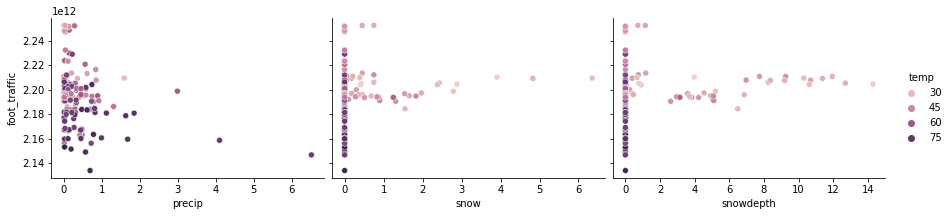

In [879]:
sns.pairplot(bw_days, x_vars=['precip', 'snow', 'snowdepth'], y_vars='foot_traffic', hue='temp', height=3, aspect=1.4, kind='scatter')

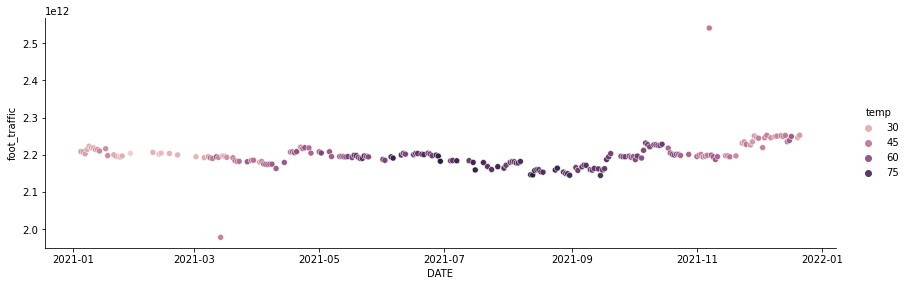

In [897]:
sns.pairplot(gw_days, x_vars=['DATE'], y_vars='foot_traffic', hue='temp', height=4, aspect=3, kind='scatter')

In [818]:
top_stations = all_year[(all_year.STATION == '42 ST-PORT AUTH')|
                               (all_year.STATION == '23 ST')|
                               (all_year.STATION == '125 ST')|
                               (all_year.STATION == 'DEKALB AV')|
                               (all_year.STATION == '34 ST_PENN STA')|
                               (all_year.STATION == 'CANAL ST')|
                               (all_year.STATION == 'FULTON ST')|
                               (all_year.STATION == 'TIMES SQ-42 ST')|
                               (all_year.STATION == '183 ST')|
                               (all_year.STATION == '34 ST_HERALD SQ')]
top_stations

,STATION,Jan Entry Diff,Feb Entry Diff,Mar Entry Diff,Apr Entry Diff,May Entry Diff,Jun Entry Diff,Jul Entry Diff,Aug Entry Diff,Sep Entry Diff,Oct Entry Diff,Nov Entry Diff,Dec Entry Diff
9,125 ST,-7.284320e-05,1.298281e-08,-0.000003,-2.705892e-04,-1.196062e-04,-3.165022e-05,-2.214282e-04,-1.549301e-05,-9.622363e-05,-1.366749e-05,0.000030,-2.617485e-07
32,183 ST,-9.879707e-09,-6.096222e-10,-0.000094,-2.041014e-08,-1.464198e-08,1.415444e-08,1.806837e-08,-4.375792e-09,4.782152e-09,-5.788103e-08,0.000077,-2.248423e-04
43,23 ST,-4.441532e-05,-5.590599e-05,-0.000102,-1.930243e-06,-6.537512e-05,1.976942e-05,2.398946e-07,1.626166e-09,-1.624184e-07,4.170051e-05,0.000121,-7.955318e-07
65,42 ST-PORT AUTH,7.018773e-07,4.739262e-05,-0.000170,1.515853e-06,-2.971729e-06,-4.052907e-07,3.988086e-06,-4.823729e-05,2.869129e-04,-3.629926e-05,0.000143,-3.807055e-07
169,CANAL ST,-1.969345e-04,1.656612e-07,-0.000061,-2.047913e-06,1.148787e-04,-2.056190e-05,4.064216e-06,-1.950707e-07,4.393107e-07,-8.789496e-07,-0.000024,1.134242e-07
194,DEKALB AV,-2.797221e-08,-1.510217e-09,-0.000060,-5.896301e-08,-4.595449e-08,4.559773e-08,-8.431961e-05,-1.431181e-08,1.829437e-08,-4.864724e-05,0.000046,-2.808687e-07
220,FULTON ST,-2.316501e-05,2.590028e-05,0.000043,3.873669e-06,-1.311423e-07,-3.071829e-05,-2.896065e-05,5.203652e-07,1.143165e-06,-9.402893e-04,0.000072,-3.617679e-04
332,TIMES SQ-42 ST,2.881596e-06,7.601224e-05,-0.000085,3.133567e-06,-2.712174e-05,1.764830e-07,2.466231e-05,1.739033e-04,7.252475e-04,-4.810636e-05,0.000069,1.622185e-06


In [843]:
ts = pd.DataFrame({
    '125 ST': [-7.284320e-05, 1.298281e-08, -0.000003, -2.705892e-04, -1.196062e-04, -3.165022e-05, -2.214282e-04, -1.549301e-05, -9.622363e-05, -1.366749e-05, 0.000030, -2.617485e-07],
    '183 ST': [9.879707e-09, -6.096222e-10, -0.000094, -2.041014e-08, -1.464198e-08, 1.415444e-08, 1.806837e-08, -4.375792e-09, 4.782152e-09, -5.788103e-08, 0.000077, -2.248423e-04],
    '23 ST': [-4.441532e-05, -5.590599e-05, -0.000102, -1.930243e-06, -6.537512e-05, 1.976942e-05, 2.398946e-07, 1.626166e-09, -1.624184e-07, 4.170051e-05, 0.000121, -7.955318e-07],
    '42 ST-PORT AUTH': [7.018773e-07, 4.739262e-05, -0.000170, 1.515853e-06, -2.971729e-06, -4.052907e-07, 3.988086e-06, -4.823729e-05, 2.869129e-04, -3.629926e-05, 0.000143, -3.807055e-07],
    'CANAL ST': [-1.969345e-04, 1.656612e-07, -0.000061, -2.047913e-06, 1.148787e-04, -2.056190e-05, 4.064216e-06, -1.950707e-07, 4.393107e-07, -8.789496e-07, -0.000024, 1.134242e-07],
    'DEKALB AV': [-2.797221e-08, -1.510217e-09, -0.000060, -5.896301e-08, -4.595449e-08, 4.559773e-08, -8.431961e-05, -1.431181e-08, 1.829437e-08, -4.864724e-05, 0.000046, -2.808687e-07],
    'FULTON ST': [-2.316501e-05, 2.590028e-05, 0.000043, 3.873669e-06, -1.311423e-07, -3.071829e-05, -2.896065e-05, 5.203652e-07, 1.143165e-06, -9.402893e-04, 0.000072, -3.617679e-04],
    'TIMES SQ-42 ST': [2.881596e-06, 7.601224e-05, -0.000085, 3.133567e-06, -2.712174e-05, 1.764830e-07, 2.466231e-05, 1.739033e-04, 7.252475e-04, -4.810636e-05, 0.000069, 1.622185e-06]
}, index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

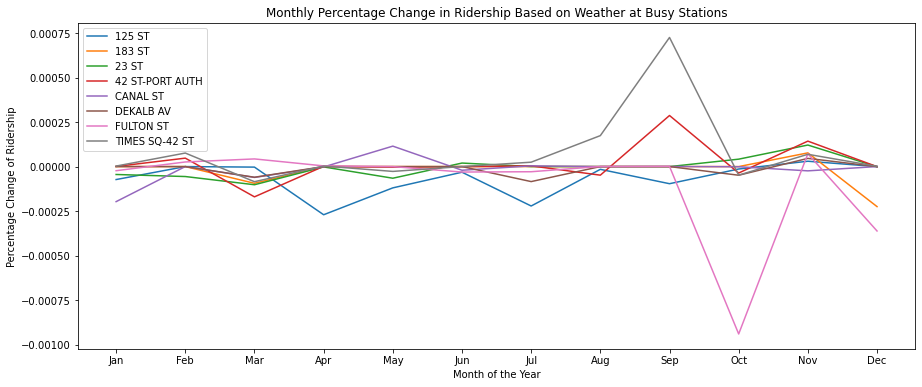

In [842]:
plt.figure(figsize=(15,6))
plt.plot(ts)
plt.xlabel('Month of the Year')
plt.ylabel('Percentage Change of Ridership')
plt.title('Monthly Percentage Change in Ridership Based on Weather at Busy Stations')
plt.legend(['125 ST', '183 ST', '23 ST', '42 ST-PORT AUTH', 'CANAL ST', 'DEKALB AV', 'FULTON ST', 'TIMES SQ-42 ST'])

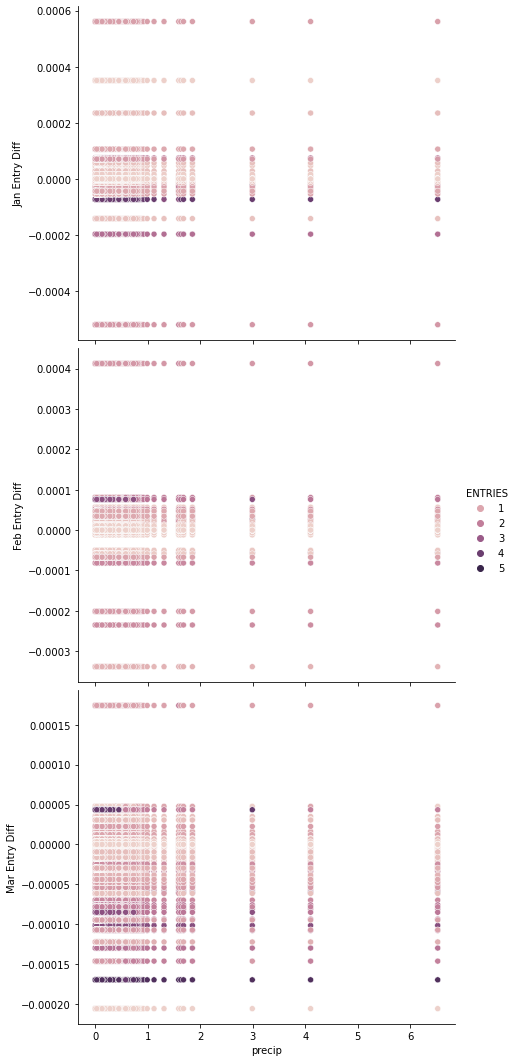

In [852]:
sns.pairplot(weatherMTA_data, y_vars=['Jan Entry Diff', 'Feb Entry Diff', 'Mar Entry Diff'], x_vars='precip', hue='ENTRIES', height=5, aspect=1.3, kind='scatter')

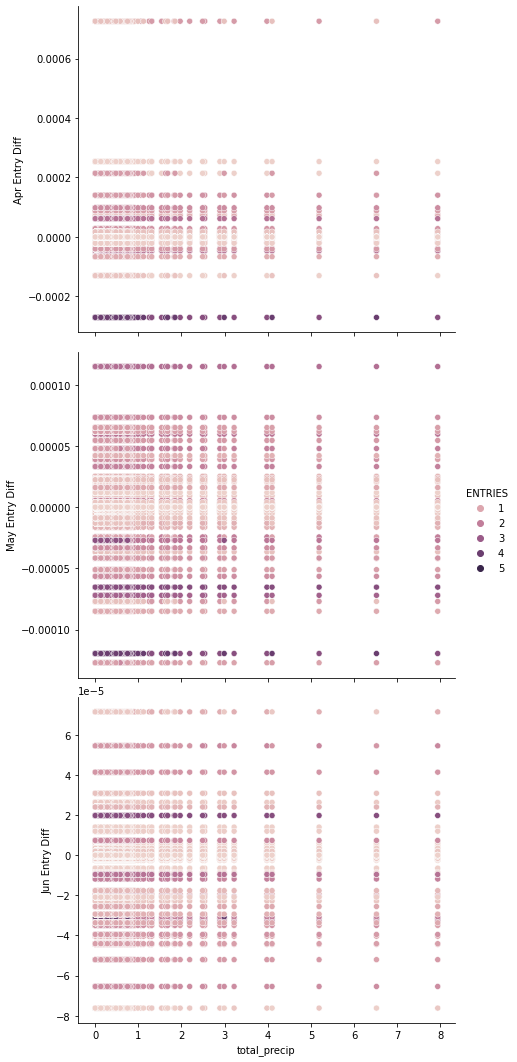

In [851]:
sns.pairplot(weatherMTA_data, y_vars=['Apr Entry Diff', 'May Entry Diff', 'Jun Entry Diff'], x_vars='total_precip', hue='ENTRIES', height=5, aspect=1.3, kind='scatter')

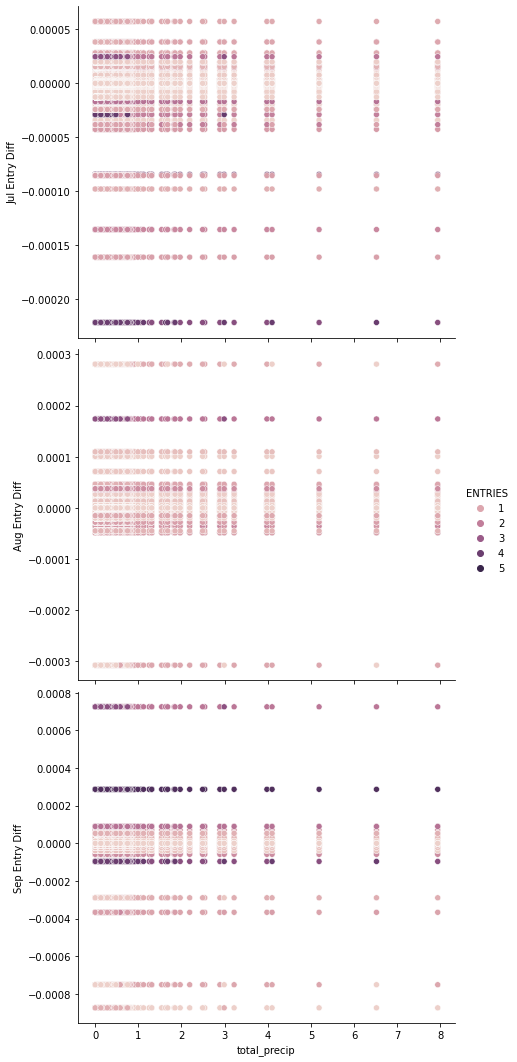

In [850]:
sns.pairplot(weatherMTA_data, y_vars=['Jul Entry Diff', 'Aug Entry Diff', 'Sep Entry Diff'], x_vars='total_precip', hue='ENTRIES', height=5, aspect=1.3, kind='scatter')

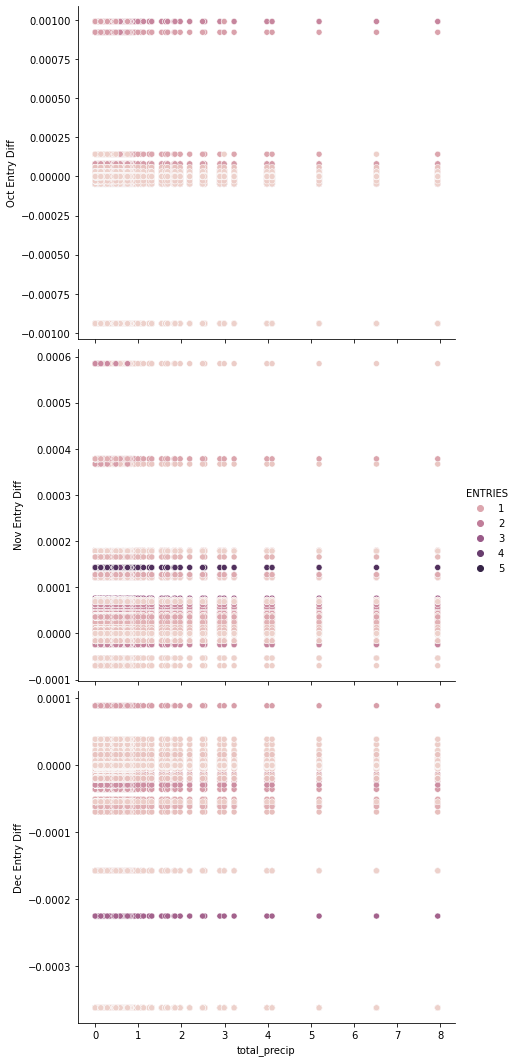

In [737]:
sns.pairplot(weatherMTA_data, y_vars=['Oct Entry Diff', 'Nov Entry Diff', 'Dec Entry Diff'], x_vars='total_precip', hue='ENTRIES', height=5, aspect=1.3, kind='scatter')

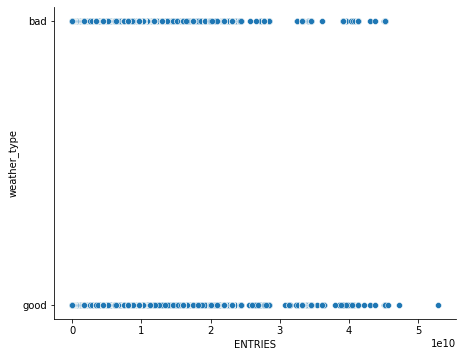

In [858]:
sns.pairplot(weatherMTA_data, y_vars=['weather_type'], x_vars='ENTRIES', height=5, aspect=1.3, kind='scatter')